<a href="https://colab.research.google.com/github/Gagan5500/Zomato/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:5], "\n")  # Display first 5 unique values

Restaurant Name: 7446 unique values
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' 'Ooma'
 'Sambo Kojin'] 

City: 141 unique values
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'] 

Address: 8918 unique values
['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City'
 'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City'
 'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City'
 'Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City'
 'Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City'] 

Locality: 1208 unique values
['Century City Mall, Poblacion, Makati City'
 'Little Tokyo, Legaspi Village, Makati City'
 'Edsa Shangri-La, Ortigas, Mandaluyong City'
 'SM Megamall, Ortigas, Mandaluyong City'
 'SM by the Bay, Mall of Asia Complex, Pasay City'] 

Locality Verbose: 1265 unique values
['Century City Mall, Poblacion, Makati City, Makati City'
 'Little Tokyo, Legaspi Village, Makat

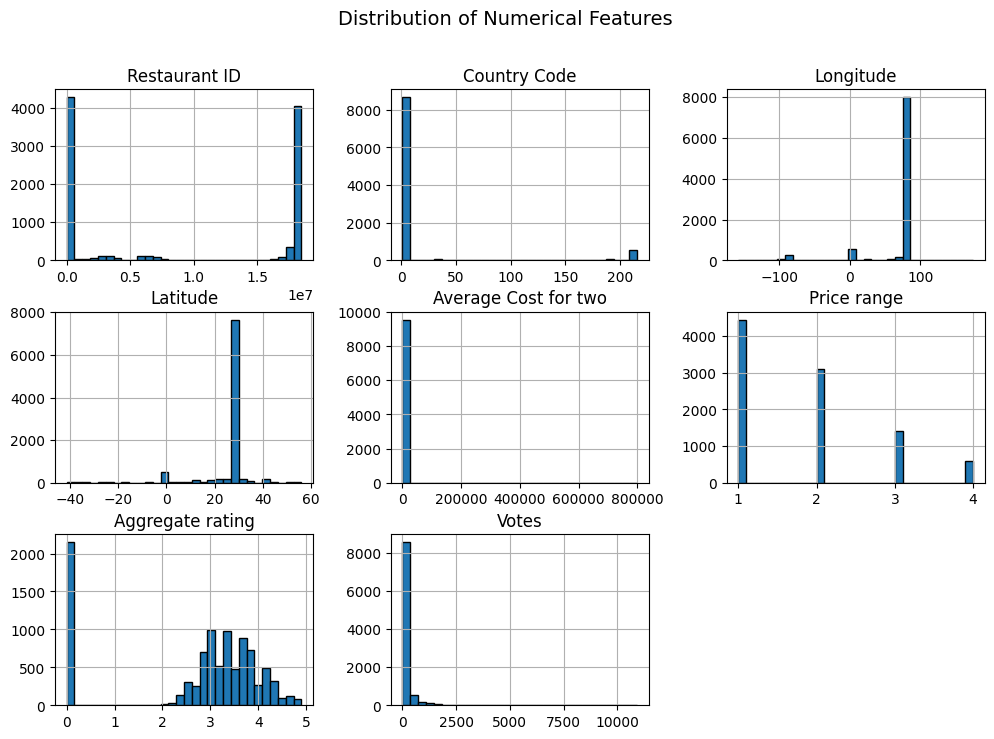

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Cuisines']

<Axes: >

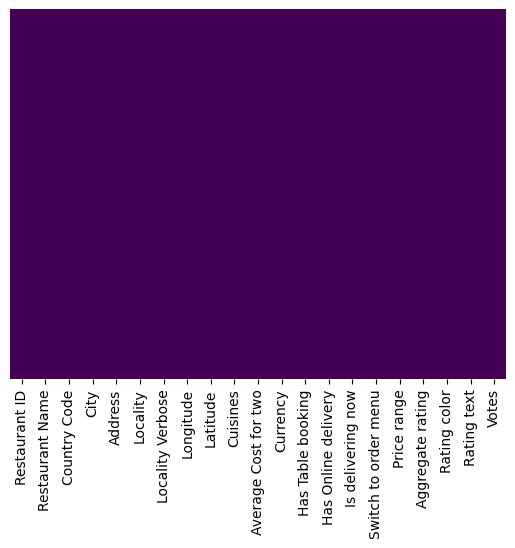

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_country=pd.read_excel('/content/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [ ]:
final_df.head(2)

NameError: name 'final_df' is not defined

In [ ]:
##To check Data Types
final_df.dtypes

NameError: name 'final_df' is not defined

In [ ]:
final_df.columns

NameError: name 'final_df' is not defined

In [ ]:
final_df.Country.value_counts()

NameError: name 'final_df' is not defined

In [ ]:
country_names=final_df.Country.value_counts().index

In [ ]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7e667bda3710>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.04083034015611012, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

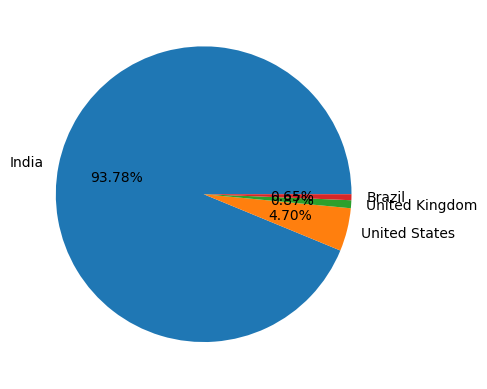

In [ ]:
##Pie Chart - Top 4 countries that uses Zomato based on transactions
plt.pie(country_val[:4],labels=country_names[:4],autopct="%1.2f%%")

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [ ]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1.When Rating is betweeen 4.5 to 4.9 ---> Excellent
2.When Rating is between 4.0 to 4.4 ----> Very Good
3.When Rating is between 3.5 to 3.9 ----> Good
4.When Rating is between 3.0 to 3.4 ----> Average
5.When Rating is between 2.5 to 2.9 ----> Average
6.When Rating is between 2.0 to 2.4 ----> Poor

In [ ]:
df = pd.read_csv('/content/zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [ ]:
final_df.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


([<matplotlib.patches.Wedge at 0x7e667bcb7dd0>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.04083034015611012, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

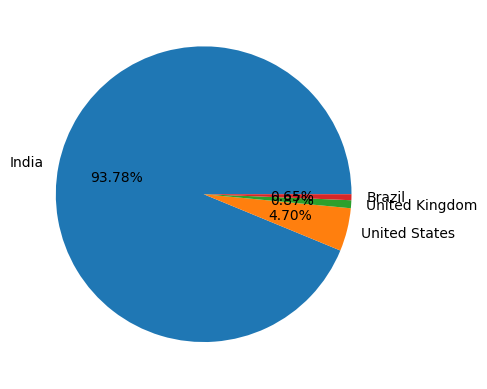

In [ ]:
##Pie Chart - Top 4 countries that uses Zomato based on transactions
plt.pie(country_val[:4],labels=country_names[:4],autopct="%1.2f%%")

In [ ]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [ ]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

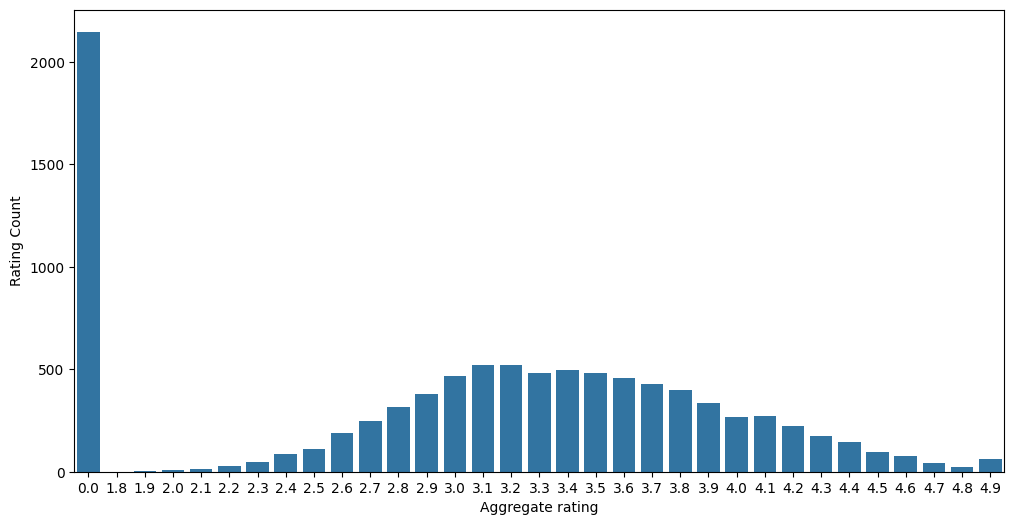

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

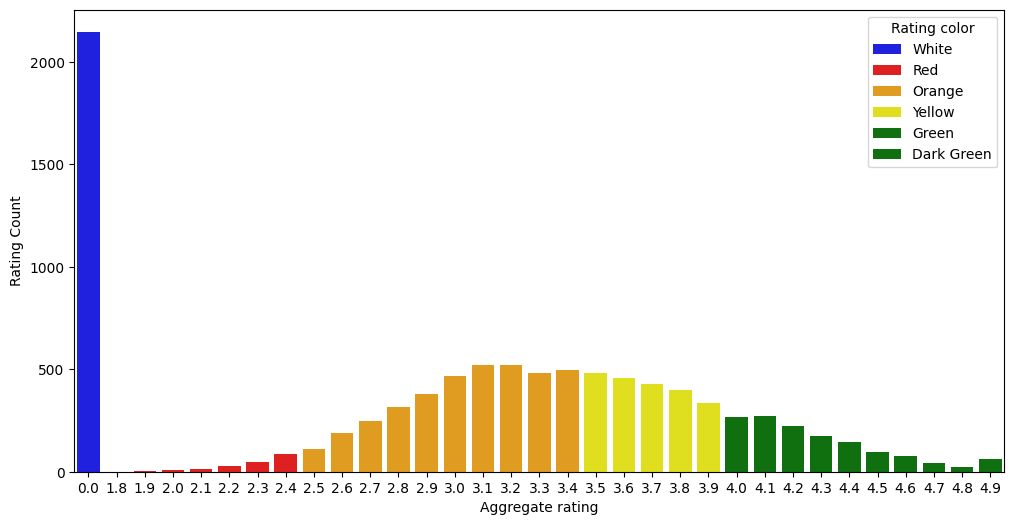

In [ ]:
sns.barplot(x="Aggregate rating", y="Rating Count", hue="Rating color", data=ratings,palette=['blue','red','orange','yellow','green','green'])

## Observation:
    1.Not Rated count is very high
    2.Maximum number of rating are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

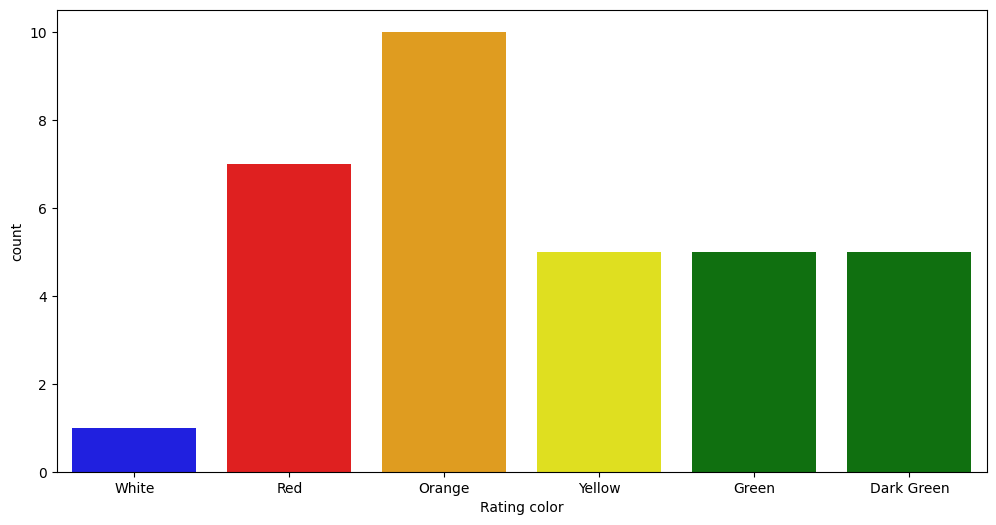

In [ ]:
sns.countplot(x="Rating color", data=ratings, hue="Rating color", palette=['blue','red','orange','yellow','green','green'], legend=False)

In [ ]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
### Find the countries name that has given zero rating
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


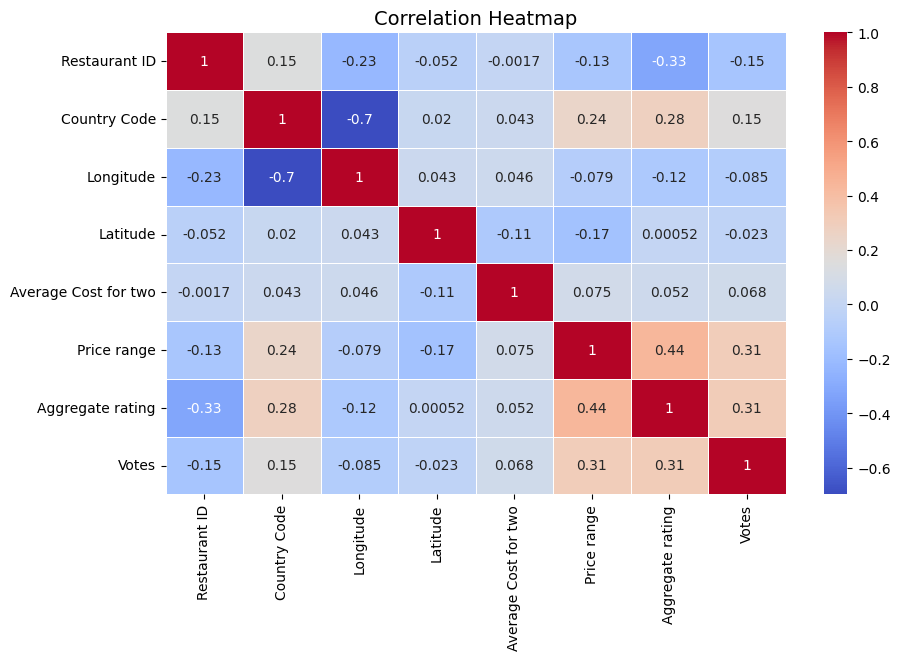

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
cuisine_counts = df_merged["Cuisines"].value_counts().head(20)  # Top 20 cuisines

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 20 Most Common Cuisines", fontsize=14)
plt.show(

SyntaxError: incomplete input (<ipython-input-26-332160f74e81>, line 9)

In [ ]:
if "Cuisines" in df_new.columns:
    # Count the occurrences of each cuisine
    cuisine_counts_new = df_new["Cuisines"].value_counts().head(20)  # Top 20 cuisines

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cuisine_counts_new.values, y=cuisine_counts_new.index, palette="viridis")
    plt.xlabel("Number of Restaurants")
    plt.ylabel("Cuisine Type")
    plt.title("Top 20 Most Common Cuisines", fontsize=14)
    plt.show()
else:
    print("The dataset does not contain a 'Cuisines' column."

SyntaxError: incomplete input (<ipython-input-27-ee44447dc5e6>, line 13)